In [2]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math
import sympy as sp
from sympy.solvers import solve
pi = math.pi

#Prints out numbers without "np.flat64" displaying
np.set_printoptions(legacy='1.25')

## Problem 3.19

In [3]:
T = np.linspace(0,1000,1001)
NF = np.zeros(len(T))

Loss = 10**(2/10) # loss, not in dB
To = 290 #degrees kelvin

i=0
for val in T :
    NF[i] = 10*math.log10((1 + (Loss - 1)*val/To))
    i+=1

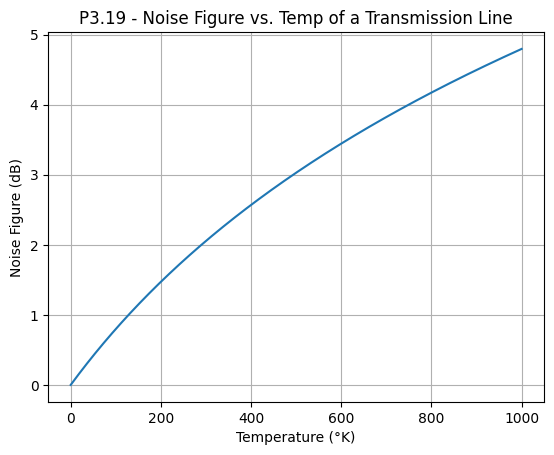

In [4]:
fig = plt.plot(T,NF) #create plot
ax = plt.gca() #get axis'
ax.set_xlabel('Temperature (°K)')
ax.set_ylabel('Noise Figure (dB)')
plt.title('P3.19 - Noise Figure vs. Temp of a Transmission Line')
ax.grid(True)

## Problem 3.17

In [14]:
fdb1 = 3
f2 = 1+(800)/290
f1 = 10**(3/10)
G1 = 10**(15/10)
Fsys = f1 +(f2-1)/G1
Fsys_db = 10*math.log10(Fsys)
Te_sys = (Fsys-1)*To
print(Te_sys)

313.92429262232207


## Problem 3.19

In [27]:
Tamb = 300
k = 1.38*10**(-23)
B = 75*10**6
L1 = 10**(1.5/10)
G1 = 1/L1
G2 = 10**(12/10)
Te1 = (L1-1)*Tamb
Te2 = 180

Ni = 10**(-125/10)

Tei = Ni/(k*B)

F2 = 1 + Te2/To
F2_dB = 10*math.log10(F2)

Te_sys = Te1 + Te2*L1
Fsys = 1 +Te_sys/To
Fsys_dB = 10*math.log10(Fsys)

Nout = G1*G2*k*B*(Tei+Te_sys)
Nout_dBm = 10*math.log10(Nout)+30
print(Nout_dBm)


-81.00288031595372


## Problem 4

In [35]:
#Normal Arrangement
L1_db = 1.5
T = 293.15
To = 290
L1 = 10**(L1_db/10)
G1 = 1/L1
B = 270 * 10**(6)

F1 = 1 + (L1-1)*(T/To)
F1_dB = 10*math.log10(F1)
F2_dB = 2
F3_dB = 2
F2 = 10**(F2_dB/10)
F3 = 10**(F3_dB/10)

G1_dB = 10*math.log10(G1)
G2_dB = 10
G3_dB = 20
G2 = 10**(G2_dB/10)
G3 = 10**(G3_dB/10)

Fsys = F1 + (F2-1)/G1 + (F3-1)/(G1*G2)
Fsys_dB = 10*math.log10(Fsys)
Tsys = (Fsys-1)*To
Si_dBm = -75
Si = 10**((Si_dBm-30)/10)

SNR_out = Si/(k*B*Tsys)
SNR_out_dB = 10*math.log10(SNR_out)

print(SNR_out)

22.073663549284113


In [36]:
#input in dB
def F_3_part(F1,F2,F3,G1,G2,G3) :
    F1 = 10**(F1/10)
    F2 = 10**(F2/10)
    F3 = 10**(F3/10)
    G1 = 10**(G1/10)
    G2 = 10**(G2/10)
    G3 = 10**(G3/10)
    return 10*math.log10((F1 + (F2-1)/G1 + (F3-1)/(G1*G2)))

A = [[F1_dB,G1_dB,'Filter'],[F2_dB,G2_dB,'Amp1'],[F3_dB,G3_dB,'Amp2']]

for first in range(0,3) :
    for second in [number for number in range(0,3) if number != first] :
        for third in [number for number in range(0,3) if ((number != first) & (number != second))] :
            if ((first != second) & (second != third) & (first != third)) :
               print(f'{A[first][2]}, {A[second][2]}, {A[third][2]}')
               print(f'F = {F_3_part(A[first][0],A[second][0],A[third][0],A[first][1],A[second][1],A[third][1])} dB')

Filter, Amp1, Amp2
F = 3.6657619583455285 dB
Filter, Amp2, Amp1
F = 3.5246500441591024 dB
Amp1, Filter, Amp2
F = 2.3279629085947526 dB
Amp1, Amp2, Filter
F = 2.158488520062291 dB
Amp2, Filter, Amp1
F = 2.0339334710216646 dB
Amp2, Amp1, Filter
F = 2.0171361864402146 dB
